# Explore the Heart Disease Cleveland UCI Dataset

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("D:\My Learning\ML Fundamentals for Healthcare\Heart Disease Cleveland UCI\heart_cleveland_upload.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [5]:
rename_dict = {
    "age": "age",
    "sex": "sex",  # will explain in README (1=male, 0=female)
    "cp": "chest_pain_type",
    "trestbps": "resting_blood_pressure",
    "chol": "serum_cholesterol",
    "fbs": "fasting_blood_sugar",
    "restecg": "rest_ecg_results",
    "thalach": "max_heart_rate",
    "exang": "exercise_induced_angina",
    "oldpeak": "st_depression",
    "slope": "st_slope",
    "ca": "num_major_vessels",
    "thal": "thalassemia",
    "condition": "condition"  # target
}


In [6]:
df_long = df.rename(columns=rename_dict)

print(df_long.head())

   age  sex  chest_pain_type  resting_blood_pressure  serum_cholesterol  \
0   69    1                0                     160                234   
1   69    0                0                     140                239   
2   66    0                0                     150                226   
3   65    1                0                     138                282   
4   64    1                0                     110                211   

   fasting_blood_sugar  rest_ecg_results  max_heart_rate  \
0                    1                 2             131   
1                    0                 0             151   
2                    0                 0             114   
3                    1                 2             174   
4                    0                 2             144   

   exercise_induced_angina  st_depression  st_slope  num_major_vessels  \
0                        0            0.1         1                  1   
1                        0            1.

In [7]:
df_long.describe()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg_results,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [8]:
df_long['resting_blood_pressure'].max()

200

In [9]:
df_long['resting_blood_pressure'].min()

94

# Heart Disease Classification with Machine Learning (No Feature Scaling)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [11]:
df_long.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg_results,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [12]:
y = df_long['condition']

x = df_long.drop('condition',axis =1)

In [13]:
y

0      0
1      0
2      0
3      1
4      0
      ..
292    1
293    1
294    1
295    0
296    1
Name: condition, Length: 297, dtype: int64

In [14]:
x

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg_results,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0


In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

In [16]:
x_train

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg_results,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
111,54,1,2,150,232,0,2,165,0,1.6,0,0,2
219,58,0,3,170,225,1,2,146,1,2.8,1,2,1
24,71,0,1,160,302,0,0,162,0,0.4,0,2,0
82,66,0,2,146,278,0,2,152,0,0.0,1,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,62,0,3,140,394,0,2,157,0,1.2,1,0,0
71,29,1,1,130,204,0,2,202,0,0.0,0,0,0
106,56,1,2,130,256,1,2,142,1,0.6,1,1,1
270,47,1,3,110,275,0,2,118,1,1.0,1,1,0


In [17]:
len(x_test)

30

In [18]:
len(x_train)

267

In [19]:
model = LogisticRegression()

In [20]:
model

LogisticRegression()

In [21]:
model.fit(x_train,y_train)

C:\Users\Chathu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred = model.predict(x_test)

In [23]:
y_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [24]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8333333333333334

In [25]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decison Tree': DecisionTreeClassifier(random_state=42)
}

In [26]:
for model_name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    
    print(f"Model: {model_name}")
    print(f"Accuracy : {accuracy:2f}")
    print("Classification Report :\n", report)
    print("="*55)

C:\Users\Chathu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy : 0.833333
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.80      0.86      0.83        14

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30

Model: Random Forest
Accuracy : 0.766667
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.69      0.76        16
           1       0.71      0.86      0.77        14

    accuracy                           0.77        30
   macro avg       0.78      0.77      0.77        30
weighted avg       0.78      0.77      0.77        30

Model: Support Vector Machine
Accuracy : 0.666667
Classification Report :
               precision    recall  f1-score   support

           0       0.67      0.75      0.71        16
           1       0.67 

# Heart Disease Classification with Machine Learning (With Feature Scaling)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
df_long.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg_results,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [29]:
df_long.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'serum_cholesterol', 'fasting_blood_sugar', 'rest_ecg_results',
       'max_heart_rate', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'condition'],
      dtype='object')

In [30]:
y = df_long['condition']

x = df_long[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'serum_cholesterol', 'fasting_blood_sugar', 'rest_ecg_results',
       'max_heart_rate', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia']]

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

In [32]:
scaler = StandardScaler()

In [33]:
x_train_scaled = scaler.fit_transform(x_train)

In [34]:
x_test_scaled = scaler.fit_transform(x_test)

In [35]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

In [36]:
for model_name,model in models.items():
    if model_name != "Decision Tree":
        model.fit(x_train_scaled,y_train)
        x_test_used = x_test_scaled
    else:
        model.fit(x_train,y_train)
        x_test_used = x_test
    
    y_pred = model.predict(x_test_used)
    
    accuracy = accuracy_score(y_test,y_pred)
    report = classification_report(y_test,y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", report)
    print("="*55)

Model: Logistic Regression
Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.80      0.86      0.83        14

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30

Model: Random Forest
Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.69      0.76        16
           1       0.71      0.86      0.77        14

    accuracy                           0.77        30
   macro avg       0.78      0.77      0.77        30
weighted avg       0.78      0.77      0.77        30

Model: Support Vector Machine
Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.85      0.79      0.8

# Regression Task - Predict Maximum Heart Rate

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df_long.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'serum_cholesterol', 'fasting_blood_sugar', 'rest_ecg_results',
       'max_heart_rate', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'condition'],
      dtype='object')

In [39]:
x = df_long[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'serum_cholesterol', 'fasting_blood_sugar', 'rest_ecg_results',
       'exercise_induced_angina', 'st_depression','st_slope', 'num_major_vessels', 'thalassemia']]

In [40]:
y = df_long['max_heart_rate']

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

In [42]:
models ={
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42)
}

In [46]:
predictions = {}

for model_name,model in models.items():
    model.fit(x_train,y_train)
    
    y_pred = model.predict(x_test)
    
    predictions[model_name] = y_pred
    
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print("="*50)

Model: Linear Regression
Mean Squared Error: 365.63
R-squared: 0.41
Model: Decision Tree Regression
Mean Squared Error: 551.70
R-squared: 0.11
Model: Random Forest Regression
Mean Squared Error: 347.19
R-squared: 0.44


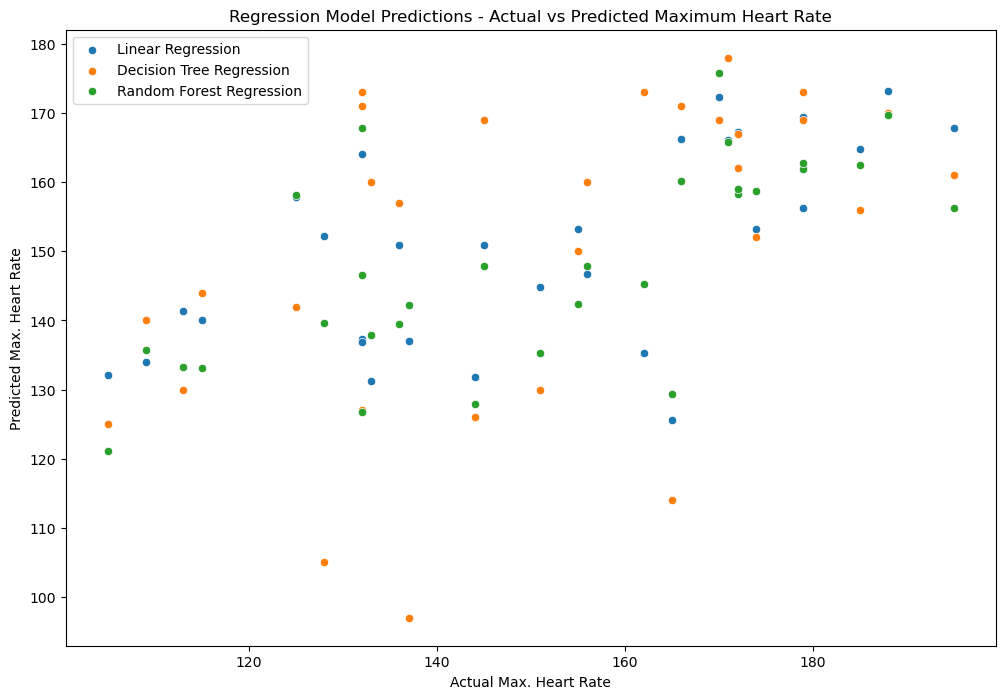

In [47]:
plt.figure(figsize=(12,8))
for model_name, y_pred in predictions.items():
    sns.scatterplot(x=y_test, y=y_pred,label=model_name)

plt.title('Regression Model Predictions - Actual vs Predicted Maximum Heart Rate')
plt.xlabel('Actual Max. Heart Rate')
plt.ylabel('Predicted Max. Heart Rate')
plt.legend()
plt.show()

# Feature Importance in Regression Task

### Feature Importance for Decision Tree Regression

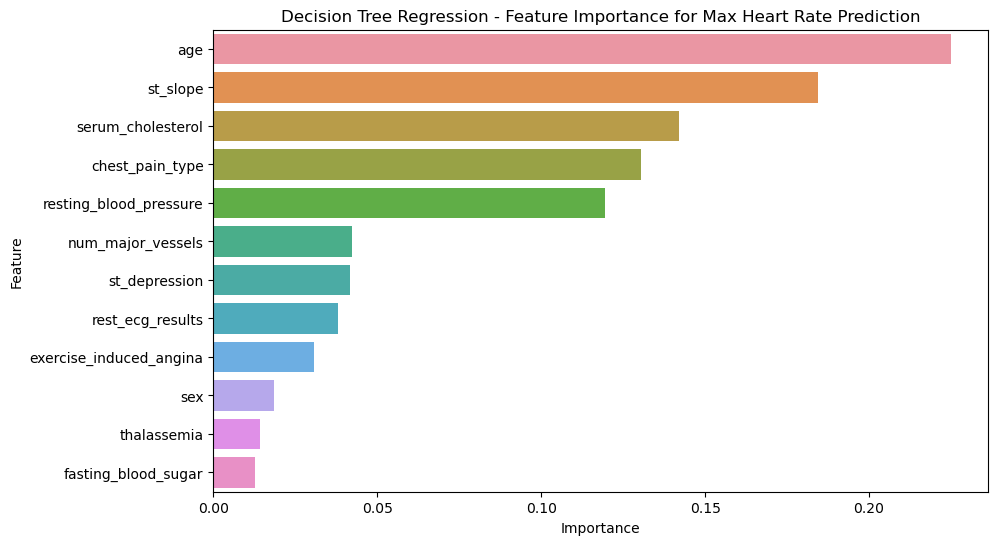

In [49]:
for model_name, model in models.items():
    if 'Tree' in model_name:
        feature_importance = model.feature_importances_
        feature_names = x.columns
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.title(f'{model_name} - Feature Importance for Max Heart Rate Prediction')
        plt.show()

### Feature Importance for Linear Regression

In [54]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [55]:
coefficients = linear_model.coef_

feature_names = x.columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

print("Coefficients for Linear Regression:")
coefficients_df

Coefficients for Linear Regression:


,Feature,Coefficient
5,fasting_blood_sugar,1.721984
6,rest_ecg_results,1.107468
3,resting_blood_pressure,0.064813
4,serum_cholesterol,0.034459
8,st_depression,-0.072397
1,sex,-0.210633
0,age,-0.838135
11,thalassemia,-0.853659
10,num_major_vessels,-1.508082
2,chest_pain_type,-3.953152


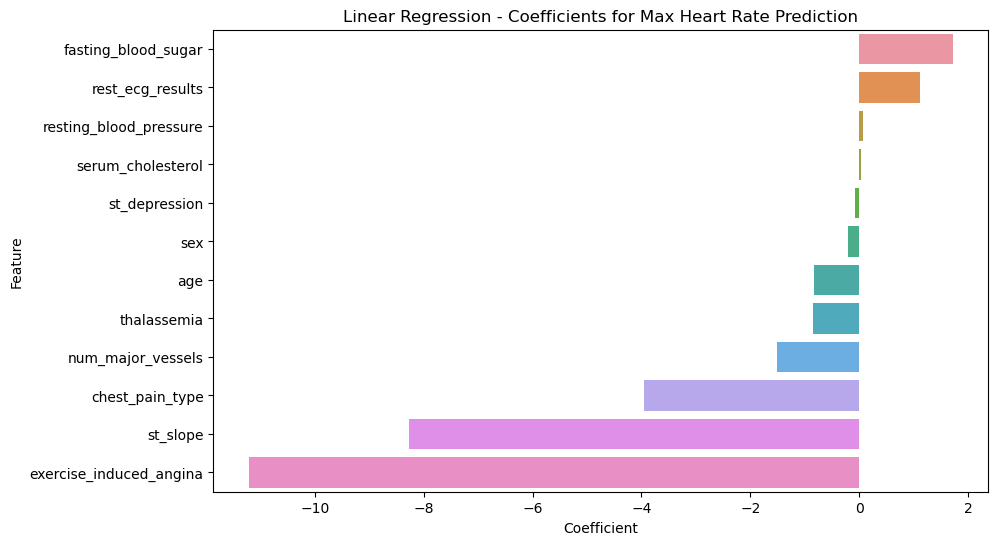

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df)
plt.title('Linear Regression - Coefficients for Max Heart Rate Prediction')
plt.show()

In [61]:
scaler = StandardScaler()

In [64]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [65]:
linear_model_scaled = LinearRegression()
linear_model_scaled.fit(x_train_scaled, y_train)

# Get the coefficients
coefficients_scaled = linear_model_scaled.coef_

# Display the coefficients along with corresponding feature names
coefficients_df_scaled = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients_scaled})
coefficients_df_scaled = coefficients_df_scaled.sort_values(by='Coefficient', ascending=False)

# Display the scaled coefficients
print("Scaled Coefficients for Linear Regression:")
coefficients_df_scaled

Scaled Coefficients for Linear Regression:


,Feature,Coefficient
4,serum_cholesterol,1.793776
6,rest_ecg_results,1.099134
3,resting_blood_pressure,1.087864
5,fasting_blood_sugar,0.601627
8,st_depression,-0.083756
1,sex,-0.099011
11,thalassemia,-0.817277
10,num_major_vessels,-1.418734
2,chest_pain_type,-3.774524
9,st_slope,-5.062790


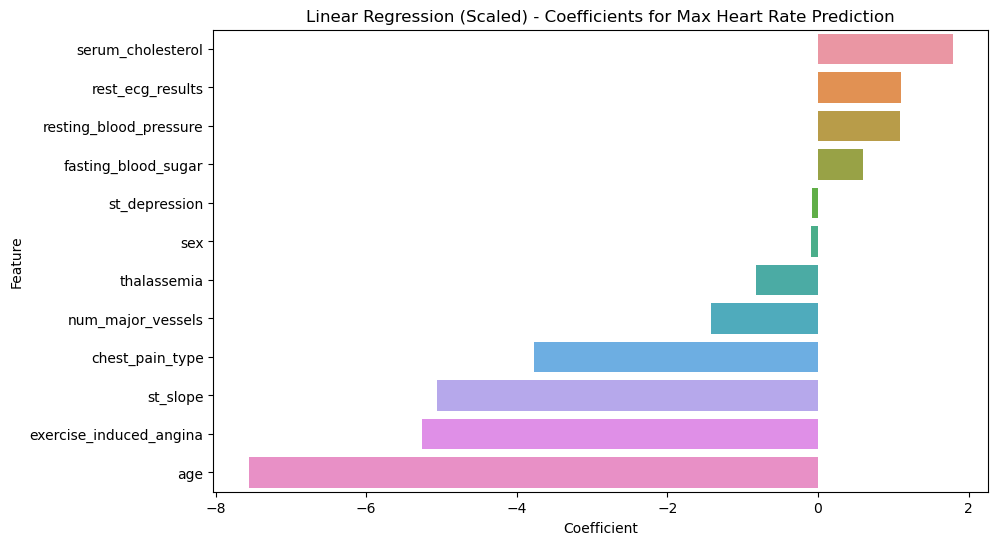

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df_scaled)
plt.title('Linear Regression (Scaled) - Coefficients for Max Heart Rate Prediction')
plt.show()

## Predict Max Heart Rate with Tree Based selected feature

In [67]:
x = df_long[['age', 'chest_pain_type', 'resting_blood_pressure',
       'serum_cholesterol', 'st_slope']]

In [68]:
y = df_long['max_heart_rate']

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1,random_state=42)

In [70]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42)
}

In [71]:
predictions = {}

for model_name, model in models.items():
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    predictions[model_name] = y_pred

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print("="*50)

Model: Linear Regression
Mean Squared Error: 360.90
R-squared: 0.42
Model: Decision Tree Regression
Mean Squared Error: 780.30
R-squared: -0.26
Model: Random Forest Regression
Mean Squared Error: 419.76
R-squared: 0.32


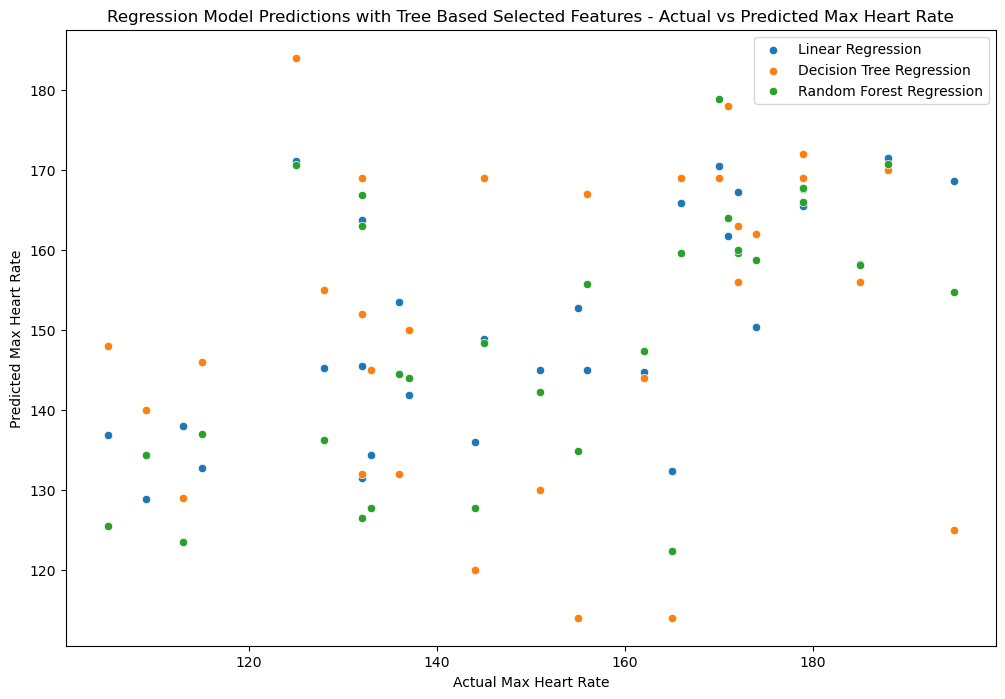

In [72]:
plt.figure(figsize=(12,8))
for model_name, y_pred in predictions.items():
    sns.scatterplot(x=y_test, y=y_pred,label=model_name)

plt.title('Regression Model Predictions with Tree Based Selected Features - Actual vs Predicted Max Heart Rate')
plt.xlabel('Actual Max Heart Rate')
plt.ylabel('Predicted Max Heart Rate')
plt.legend()
plt.show()

## Predict Max Heart Rate with Linear Based (non scaled) selected feature

In [73]:
x = df_long[['chest_pain_type', 'fasting_blood_sugar', 'rest_ecg_results',
       'exercise_induced_angina', 'st_slope']]

In [75]:
y = df_long['max_heart_rate']

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1,random_state=42)

In [77]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42)
}

In [78]:
predictions = {}

for model_name, model in models.items():
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    predictions[model_name] = y_pred

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print("="*50)

Model: Linear Regression
Mean Squared Error: 448.87
R-squared: 0.27
Model: Decision Tree Regression
Mean Squared Error: 401.26
R-squared: 0.35
Model: Random Forest Regression
Mean Squared Error: 355.42
R-squared: 0.42


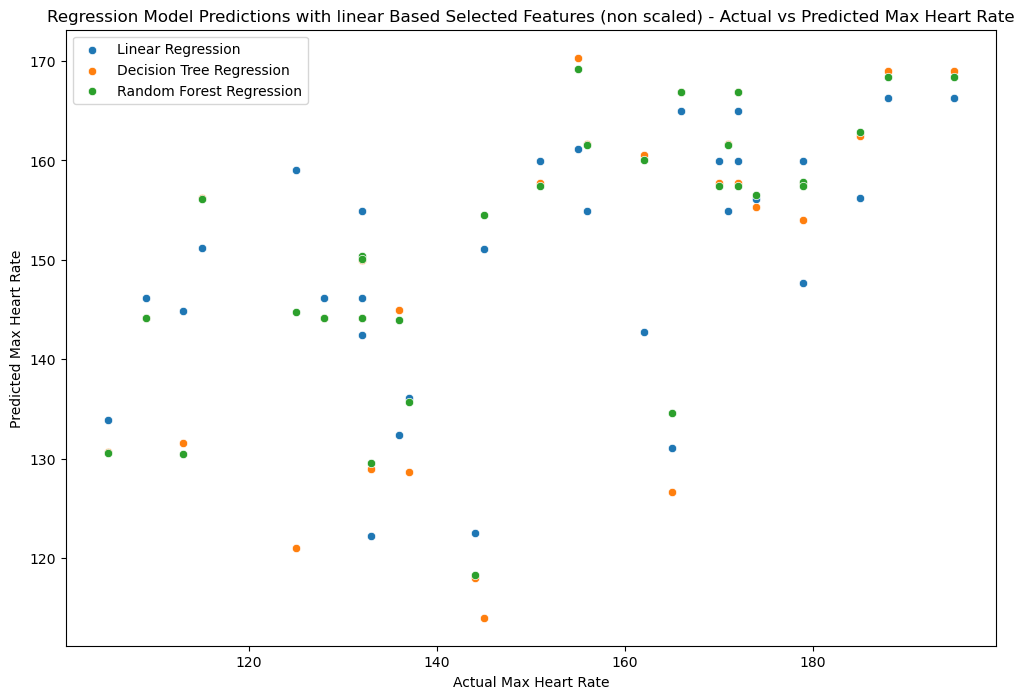

In [79]:
plt.figure(figsize=(12,8))
for model_name, y_pred in predictions.items():
    sns.scatterplot(x=y_test, y=y_pred,label=model_name)

plt.title('Regression Model Predictions with linear Based Selected Features (non scaled) - Actual vs Predicted Max Heart Rate')
plt.xlabel('Actual Max Heart Rate')
plt.ylabel('Predicted Max Heart Rate')
plt.legend()
plt.show()

## Predict Max Heart Rate with Linear Based (scaled) selected feature


In [86]:
x = df_long[['age', 'chest_pain_type', 
       'num_major_vessels', 'exercise_induced_angina', 'st_slope']]

In [87]:
y = df_long['max_heart_rate']

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1,random_state=42)

In [89]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42)
}

In [90]:
predictions = {}

for model_name, model in models.items():
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    predictions[model_name] = y_pred

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print("="*50)

Model: Linear Regression
Mean Squared Error: 381.56
R-squared: 0.38
Model: Decision Tree Regression
Mean Squared Error: 540.71
R-squared: 0.12
Model: Random Forest Regression
Mean Squared Error: 407.03
R-squared: 0.34


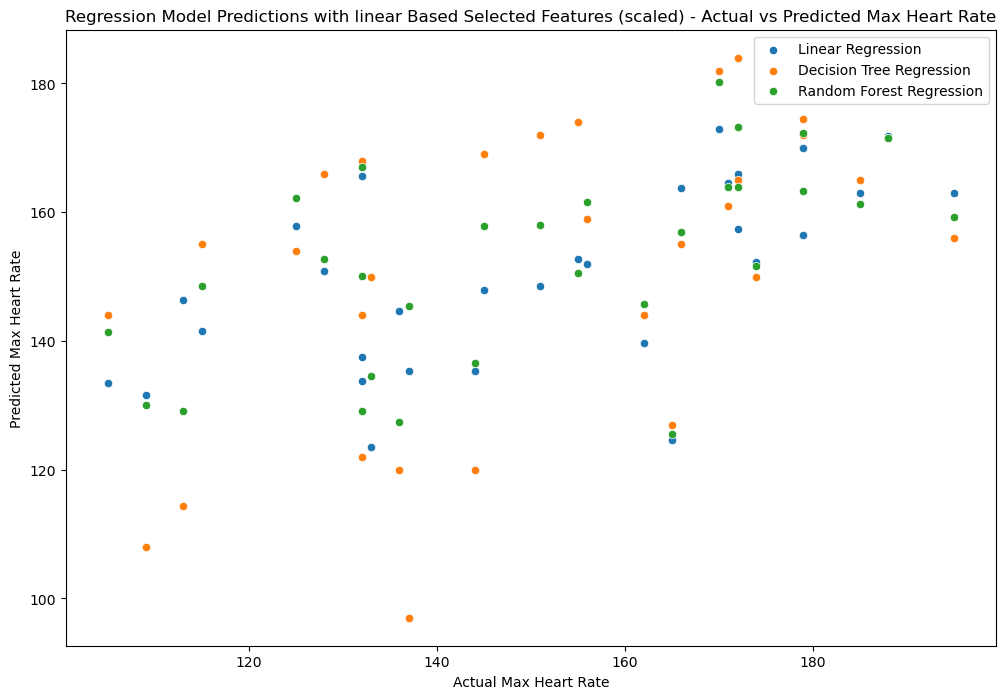

In [91]:
plt.figure(figsize=(12,8))
for model_name, y_pred in predictions.items():
    sns.scatterplot(x=y_test, y=y_pred,label=model_name)

plt.title('Regression Model Predictions with linear Based Selected Features (scaled) - Actual vs Predicted Max Heart Rate')
plt.xlabel('Actual Max Heart Rate')
plt.ylabel('Predicted Max Heart Rate')
plt.legend()
plt.show()

# Clustering Task

#### Can we group patients into low-risk and high-risk profiles based on age, chest pain, cholesterol, ST depression, etc.?

In [92]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [93]:
df_long

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg_results,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [95]:
features = ["age", "serum_cholesterol", "st_depression", "chest_pain_type", "resting_blood_pressure", "max_heart_rate", "st_slope"]
x_clustering = df_long[features]

In [96]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_clustering)

In [97]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df_long["Cluster"] = kmeans.fit_predict(x_scaled)

C:\Users\Chathu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [98]:
print(df_long["Cluster"].value_counts())

Cluster
0    175
1    122
Name: count, dtype: int64


In [99]:
print(pd.crosstab(df_long["Cluster"], df_long["condition"]))

condition    0   1
Cluster           
0          132  43
1           28  94


In [100]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)
df_long["PCA1"] = x_pca[:,0]
df_long["PCA2"] = x_pca[:,1]

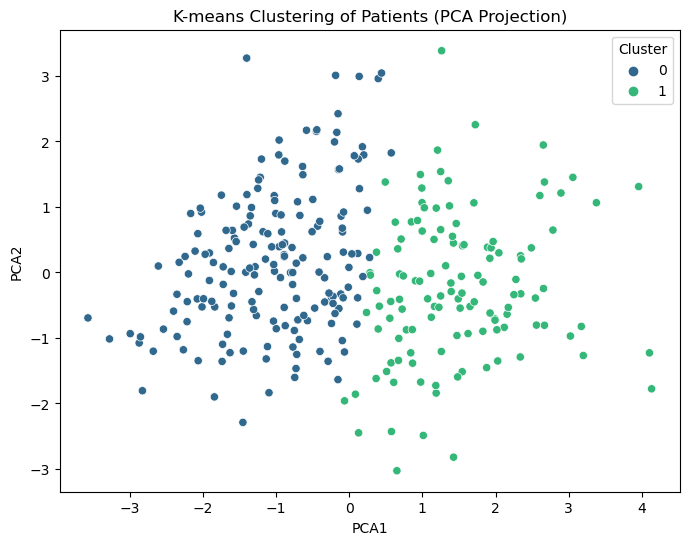

In [101]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", palette="viridis", data=df_long)
plt.title("K-means Clustering of Patients (PCA Projection)")
plt.show()